In [ ]:
from fastai2.vision.all import *
from fastai2.vision.widgets import *

In [2]:
path = Path('data')

In [3]:
fns = get_image_files(path)
fns

(#50) [Path('data/2/image_0.png'),Path('data/2/image_13.png'),Path('data/2/image_14.png'),Path('data/2/image_18.png'),Path('data/2/image_19.png'),Path('data/2/image_2.png'),Path('data/2/image_20.png'),Path('data/2/image_21.png'),Path('data/2/image_22.png'),Path('data/2/image_23.png')...]

In [4]:
tables = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(size=(450,575), method='crop')
)

In [147]:
Resize??

In [5]:
dls = tables.dataloaders(path, bs=40)

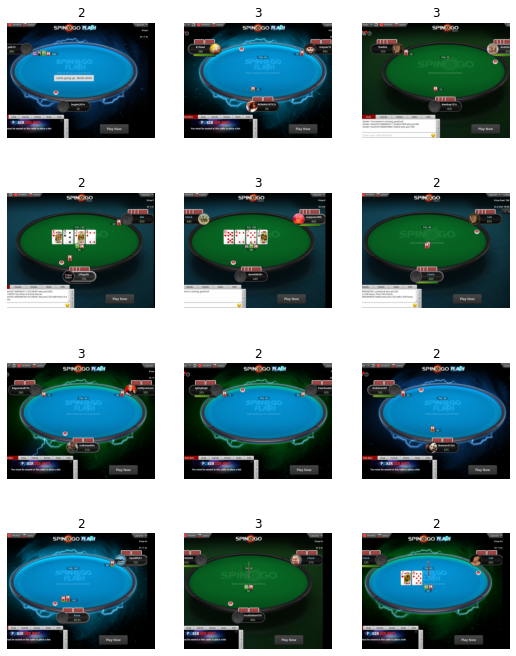

In [6]:
dls.train.show_batch(max_n=12, nrows=4)

In [165]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)

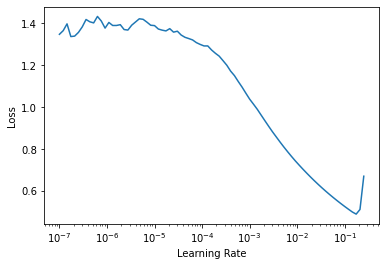

In [166]:
lr_min,lr_steep = learn.lr_find()

In [167]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 1.74e-02, steepest point: 7.59e-07


In [162]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)

In [163]:
learn.fit_one_cycle(1, 1e-4)

epoch,train_loss,valid_loss,error_rate,time
0,1.802675,6.358006,0.500000,00:03


In [164]:
learn.unfreeze()
learn.fit_one_cycle(25, lr_max=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,1.546462,5.507766,0.500000,00:02
1,1.438108,4.882901,0.500000,00:02
2,1.529727,4.315001,0.500000,00:02
3,1.506552,3.782151,0.500000,00:02
4,1.538466,3.267323,0.500000,00:02
5,1.552629,2.870226,0.500000,00:02
6,1.554442,2.526000,0.500000,00:02
7,1.523757,2.293852,0.500000,00:02
8,1.478113,2.074708,0.500000,00:02
9,1.463028,1.896453,0.500000,00:02


In [8]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)

In [9]:
learn.fine_tune(100, base_lr=2e-2)

epoch,train_loss,valid_loss,error_rate,time
0,1.258306,6.770593,0.500000,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.838102,2.551990,0.500000,00:02
1,0.563016,2.814705,0.500000,00:02
2,0.388500,3.172536,0.500000,00:02
3,0.304170,3.197115,0.500000,00:02
4,0.247463,3.301479,0.500000,00:02
5,0.207884,3.202643,0.500000,00:02
6,0.178740,2.935795,0.500000,00:02
7,0.154940,2.495049,0.500000,00:02
8,0.136450,1.946971,0.500000,00:02
9,0.122651,1.039593,0.500000,00:02


In [10]:
learn.export()